<h1>Voltron IA 🤖</h1>
<p>Ce projet nécessite du machine learning (exprimé dans l'énoncé) je me suis donc intéressé à la chose j'ai pu découvrir qu'il existait 3 types de façon d'apprentissage pour une IA

<strong>L'apprentissage supervisé</strong> est une tâche d'apprentissage automatique consistant à apprendre une fonction de prédiction à partir d'exemples annotés

<strong>l'apprentissage non supervisé</strong> désigne la situation d'apprentissage automatique ou les données ne sont pas étiquetées il s'agit donc de découvrir les structures sous-jacentes à ces données en découvrant des tendances

mais aussi <strong>l'apprentissage par renforcement</strong> qui consiste à entraîner un modèle d'intelligence artificielle de s'entraîner d'elle-même à apprendre à réussir un objectif au sein un environnement incertain et potentiellement complexe

Dans le cadre de ce projet voltron j'ai décidé de partir sur un *Apprentissage SUPERVISÉ* , 
    
Avec l'apprentissage supervisé la machine peut apprendre certains patern en étudiant des exemples ce qui est parfait dans notre cas où l'on veut déterminer des trajectoires à partir de données de parcours fournit par l’équipe de DATA
    
À l'intérieur d'un apprentissage supervisé il existe 2 autres distinctions qui nous aidera dans le choix de notre algorithme de machine learning 
    
Cela dépend de la sortie que l'on attend de notre programme est-ce une valeur dite *continue* où est-ce une valeur dite *discrète*,  dans le premier cas il s'agit d'une <strong>régression</strong> et dans le 2e cas d'une  <strong>classification</strong>
    
    
Pour définir les trajectoire, je n'est pas trouvé de  *classifieur* pour déduire des trajectoires, mais l'existence de la *régression* me fait penser être la bonne solution je m'y suis alors intéressé j'ai appris qu'il existait 3 types de modèle de *régression* une <strong>linéaire simple</strong> une <strong>multi-linéaire</strong> et une <strong>polynomiale</strong> il a fallu donc faire un choix après plusieurs recherches :
</p>

<h2>Script Python de Recherche 🤔</h2>

<h3>Libriarie</h3>

In [1]:
import json
import matplotlib.pyplot as plt
from random import *
import random as rnd
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from pandas.plotting import autocorrelation_plot

<h1>Lecture des datas 📄</h1>
<p>Je pensais utiliser les données que m'avaient fournies l’équipe des DATA en réutilisant les localisations GPS d'un cycliste et en créant plusieurs chemin à partir de celui existant en changeant de quelques centièmes les coordonnées X et Y, sauf que bien évidemment, les trajets se ressemblent tous étant donné qu'elles proviennent d'une même origine.</p>

In [2]:
# Opening JSON file
f = open('tracksgeo.json')
json_file = json.load(f)

In [3]:
tab_X = []
tab_Y = []
random_traject_coord = []
rand_X = rnd.uniform(5.3, 6.2)
rand_Y = rnd.uniform(43.1, 44.9)

for data in json_file['features']:
    for coord in data['geometry']['coordinates']:
        for x , y  in coord:
            tab_X.append(x)
            # création du dataset aléatoire 
            random_traject_coord.append([x + rnd.uniform(0, 0.01),y + rnd.uniform(0, 0.01)])
            tab_Y.append(y)
# Closing file
f.close()

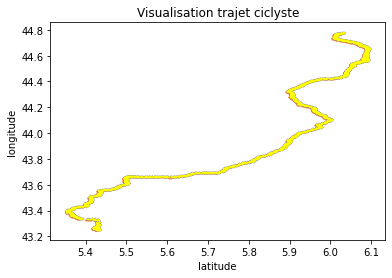

In [4]:
plt.scatter(tab_X, tab_Y, 0.1, c='coral')

tab_X = []
tab_Y = []
for x , y in random_traject_coord:
    tab_X.append(x)
    tab_Y.append(y)
    
plt.scatter(tab_X,tab_Y,0.1, 'blue')           
        
tab_X = []
tab_Y = []
for x , y in random_traject_coord:
    tab_X.append(x)
    tab_Y.append(y)
    
plt.scatter(tab_X,tab_Y,0.1, 'yellow') 
plt.title('Visualisation trajet ciclyste')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show() 

<h3>Visualisation nuage de points de l'equipe de DATA (chemin parcouru par le cycliste)</h3>


<h1>Random Walk in 2D 🚶</h1>
<p>J'ai donc pensé de trouver ma propre source de données, je me suis alors intéressé à l'algorithme Random Walk celui-ci permettant de créer des chemins aléatoire, et donc une fois les chemins en ma possession tous aussi différents les uns des autres, je pensais pouvoir entraîner mon IA avec ce dataset néanmoins lorsque j'essaye de visualiser ce dataset en nuage de points je ne perçois pas de régularité et donc ne parvient pas à  faire un choix de modèle <strong>(linéaire, linéaire multiple ou polynomial)</strong> , j'aurais dû m'en douter étant donné que ce sont des données tiré d'une fonction aléatoires 🙄</p>

In [5]:
def random_walk_1D(n):
    x, y = 0, 0
    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]
    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):
        # Randomly select either UP or DOWN
        step = rnd.choice(directions)
        
        # Move the object up or down
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1
        # Keep track of the positions
        positions.append(y)
    return timepoints, positions

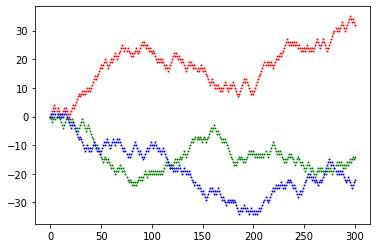

In [6]:
rw_1 = random_walk_1D(300)
rw_2 = random_walk_1D(300)
rw_3 = random_walk_1D(300)
plt.scatter(rw_1[0], rw_1[1], 1,'red', )
plt.scatter(rw_2[0], rw_2[1], 1,'green', )
plt.scatter(rw_3[0], rw_3[1], 1,'blue', )
plt.show()

<h3>Représentation d'une regression polynomial</h3>

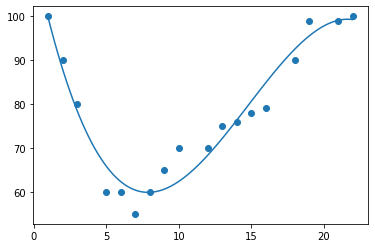

In [10]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

my_model = np.poly1d(np.polyfit(x, y, 3))

my_line = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(my_line, my_model(my_line))
plt.show()

<h1>🤓 FOLLOW UP ! </h1>
<p>Après rendez-vous avec l'expert j'en ai conclu qu'il fallait que j'extrapole mes informations que je donne à mon IA c'est à dire que je devais créer des contextes dans lesquelles l’IA aller devoir apprendre</p>

<p>J'ai défini alors une structure de donnée { "météo" : "" , "vitesse" : "" , "éclairage" : "",  "température" : "" }</p>

<fieldset><legend>Météo</legend>
<ul>
    <li>Ciel dégagé</li>    
    <li>Orageux</li>    
    <li>Nuageux</li>
</ul>
</fieldset>
<fieldset><legend>Vitesse</legend>
    <p>Variation de 10km/h à 100km/h</p>
</fieldset>
<fieldset><legend>Température</legend>
    <p>Variation de -10° à 45°</p>
</fieldset>
<fieldset><legend>Éclairage</legend>
    <p>Nuit | Journée</p>
</fieldset>



In [7]:
def random_fake_data(n):
    data = []
    meteo_values = ["Ciel dégagé","Orageux","Nuageux"]
    brightness_values = ["Nuit","Journée"]
    for i in range(n):
        speed_random_value = rnd.randint(10, 100)
        temperature_random_value = rnd.randint(-10, 45)
        brightness_random_value = brightness_values[rnd.randint(0, 1)]
        meteo_random_value = meteo_values[rnd.randint(0,len(meteo_values)-1)]
        fake_json =  { "météo" : meteo_random_value  , "vitesse" : speed_random_value , "éclairage" : brightness_random_value, "température" : temperature_random_value }
        data.append(fake_json)
    return data

print(random_fake_data(42)) 


[{'météo': 'Nuageux', 'vitesse': 42, 'éclairage': 'Nuit', 'température': 3}, {'météo': 'Ciel dégagé', 'vitesse': 30, 'éclairage': 'Journée', 'température': 24}, {'météo': 'Ciel dégagé', 'vitesse': 34, 'éclairage': 'Nuit', 'température': 40}, {'météo': 'Orageux', 'vitesse': 75, 'éclairage': 'Nuit', 'température': 19}, {'météo': 'Ciel dégagé', 'vitesse': 86, 'éclairage': 'Journée', 'température': 38}, {'météo': 'Ciel dégagé', 'vitesse': 73, 'éclairage': 'Journée', 'température': -9}, {'météo': 'Ciel dégagé', 'vitesse': 86, 'éclairage': 'Journée', 'température': 35}, {'météo': 'Nuageux', 'vitesse': 72, 'éclairage': 'Journée', 'température': -2}, {'météo': 'Nuageux', 'vitesse': 28, 'éclairage': 'Journée', 'température': -9}, {'météo': 'Nuageux', 'vitesse': 23, 'éclairage': 'Nuit', 'température': 33}, {'météo': 'Ciel dégagé', 'vitesse': 82, 'éclairage': 'Nuit', 'température': 12}, {'météo': 'Nuageux', 'vitesse': 53, 'éclairage': 'Journée', 'température': -2}, {'météo': 'Ciel dégagé', 'vites

<h3>Set de fake data 💯</h3>